<a href="https://colab.research.google.com/github/Sandeepkumar607/Safety_Model/blob/main/Safety_Violation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers transformers accelerate --upgrade
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 13.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as Safety_0.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

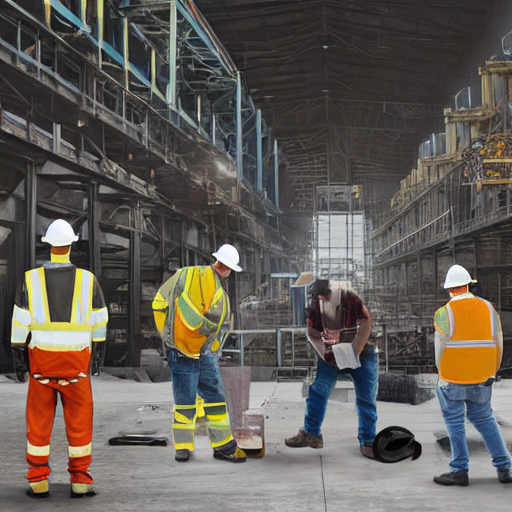

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

pipe.enable_xformers_memory_efficient_attention()

prompt = (
    "A bustling steel company scene showing workers ignoring safety protocols. "
    "The background features heavy machinery and large steel structures. "
    "In the foreground, a worker in full PPE is distractedly talking on a smartphone, "
    "while another worker is casually leaning on a safety barricade in a high-risk area. "
    "The atmosphere is realistic, highlighting the industrial setting and safety violations."
)

try:
    with torch.autocast("cuda"):
        images = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images

    for i, img in enumerate(images):
        img.show()  # Display the image
        filename = f"Safety_{i}.png"
        img.save(filename)  # Save the image to a file
        print(f"Image saved as {filename}")

    # Download the images
    from google.colab import files
    for i in range(len(images)):
        files.download(f"Safety_{i}.png")

except Exception as e:
    print(f"An error occurred during image generation: {e}")

# Define a function to display images
def display_images(images):
    from IPython.display import display
    for img in images:
        display(img)

# Display the generated images
display_images(images)
